✅ Conversion Factor: 1 pixel = 1.347 μm


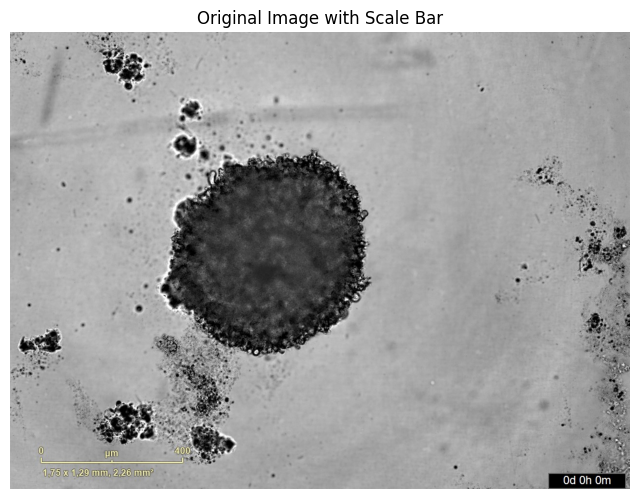

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/gbm/VID118_A1_1_00d00h00m.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to find the scale bar
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area (largest first)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Find the longest horizontal line (likely the scale bar)
scale_bar_length_px = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    
    # Assume the scale bar is much wider than it is tall (high aspect ratio)
    if aspect_ratio > 10 and w > 50:  
        scale_bar_length_px = w
        break

# Known scale from the image (400 μm)
known_scale_um = 400.0  # The scale bar represents 400 micrometers

# Compute pixels per micrometer conversion factor
if scale_bar_length_px > 0:
    px_to_um = known_scale_um / scale_bar_length_px
    print(f"✅ Conversion Factor: 1 pixel = {px_to_um:.3f} μm")
else:
    print("⚠️ Scale bar not detected correctly!")

# Display the image with detected scale bar
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Scale Bar")
plt.axis("off")
plt.show()
